In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

In [3]:
Mar_1 = pd.merge(df1, df2)

## Dealing with missing values

In [4]:
Mar_1.info()
#entries = observations = rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   income               2216 non-null   object 
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#remove the column that contains too many missing values
Mar_1.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Response                  0
Complain                  0
Country                   0
Sex                    1578
dtype: int64

In [6]:
Mar_1.shape

(2240, 29)

In [7]:
#remove the column that contains too many missing values
#Mar_1.drop('Sex',axis = 'columns', inplace = True) 跟下行意義一樣
Mar_1 = Mar_1.drop('Sex',axis = 'columns' , inplace = False)

In [8]:
Mar_1.shape

(2240, 28)

In [9]:
Mar_1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
Mar_1.notnull().sum()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Response               2240
Complain               2240
Country                2240
dtype: int64

In [11]:
#pick up the missing value in 'income' column
Mar_1[Mar_1.income.isnull()]
#check whether these observations are important or not

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/2014,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/2013,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/2013,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/2014,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/2013,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [12]:
Mar_1.head()

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


## change data type

In [13]:
Mar_1.dtypes
#income的data type不對，要把$跟,拿掉

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [14]:
Mar_1.value_counts

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [15]:
Mar_1['income'] = Mar_1['income'].str.replace(',','').str.replace('$','')

In [16]:
Mar_1['income'] = Mar_1['income'].astype(float)

In [17]:
#fill the missing value with MEAN
Mar_1['income'].fillna(Mar_1['income'].mean(), inplace = True)
print(Mar_1.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


In [18]:
Mar_1.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [19]:
Mar_1.notnull().sum()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
income                 2240
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Response               2240
Complain               2240
Country                2240
dtype: int64

In [20]:
Mar_1.sort_values('income')

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1466,6862,1971,Graduation,Divorced,1730.0,0,0,5/18/2014,65,1,...,0,20,0,0,0,0,0,0,0,SP
961,5376,1979,Graduation,Married,2447.0,1,0,1/6/2013,42,1,...,0,1,0,0,0,0,0,0,0,US
1291,11110,1973,Graduation,Single,3502.0,1,0,4/13/2013,56,2,...,0,14,0,0,0,0,0,0,0,IND
663,9931,1963,PhD,Married,4023.0,1,1,6/23/2014,29,5,...,0,19,0,0,0,0,0,0,0,SP
14,10311,1969,Graduation,Married,4428.0,0,1,10/5/2013,0,16,...,0,1,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/2014,98,20,...,0,0,0,0,0,0,0,0,0,IND
853,5336,1971,Master,Together,157733.0,1,0,6/4/2013,37,39,...,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,8/4/2012,21,55,...,1,0,0,0,0,0,0,0,0,US
731,1503,1976,PhD,Together,162397.0,1,1,6/3/2013,31,85,...,1,1,0,0,0,0,0,0,0,SP


In [21]:
Mar_1.shape

(2240, 28)

## create dummy variables in pandas

In [22]:
#dummies = (k-1) variables can represent all information, the first line is the baseline
pd.get_dummies(Mar_1.Education)

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
2235,0,0,0,0,1
2236,1,0,0,0,0
2237,0,0,1,0,0
2238,0,0,1,0,0


In [23]:
#iloc[ALL Rows(:),Columns starting in position 1 through the end]
pd.get_dummies(Mar_1.Education).iloc[:,1:]

,Basic,Graduation,Master,PhD
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2235,0,0,0,1
2236,0,0,0,0
2237,0,1,0,0
2238,0,1,0,0


In [24]:
#prefix: back to the original variable name
pd.get_dummies(Mar_1.Education, prefix = 'Education').iloc[:,1:]

,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2235,0,0,0,1
2236,0,0,0,0
2237,0,1,0,0
2238,0,1,0,0


In [25]:
Mar_1.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [26]:
pd.get_dummies(Mar_1.Marital_Status, prefix='Marital_Status')

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2235,0,0,1,0,0,0,0,0
2236,0,0,0,1,0,0,0,0
2237,0,0,1,0,0,0,0,0
2238,0,0,0,1,0,0,0,0


In [27]:
Marital_Status_Dummies = pd.get_dummies(Mar_1.Marital_Status, prefix='Marital_Stat')

In [28]:
Marital_Status_Dummies = pd.get_dummies(Mar_1.Marital_Status, prefix='Marital_Stat').iloc[:,1:]

In [29]:
Mar2 = pd.concat([Mar_1,Marital_Status_Dummies], axis = 1)

In [30]:
Mar2.head()

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,Marital_Stat_Alone,Marital_Stat_Divorced,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Together,Marital_Stat_Widow,Marital_Stat_YOLO
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,1,0,SP,0,1,0,0,0,0,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,1,0,CA,0,0,0,1,0,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0,0,US,0,0,1,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,0,0,AUS,0,0,0,0,1,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,1,0,SP,0,0,0,1,0,0,0


In [31]:
Mar3 = pd.get_dummies(Mar_1, columns=['Education','Marital_Status','Country'])

In [32]:
Mar3.tail(20)

,ID,Year_Birth,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
2220,5871,1979,24401.0,0,0,8/31/2012,98,73,28,217,...,0,0,0,0,0,0,0,1,0,0
2221,3846,1974,42557.0,0,1,8/29/2012,98,192,5,53,...,0,0,0,0,0,0,0,0,1,0
2222,10001,1985,7500.0,1,0,8/1/2012,98,5,17,17,...,0,0,0,0,0,0,0,0,1,0
2223,2831,1976,78416.0,0,1,6/27/2014,99,453,38,279,...,0,0,0,0,0,0,0,0,1,0
2224,868,1966,44794.0,0,1,6/8/2014,99,54,0,7,...,0,0,0,0,0,0,0,1,0,0
2225,7212,1966,44794.0,0,1,6/8/2014,99,54,0,7,...,0,0,1,0,0,0,0,0,0,0
2226,1743,1974,69719.0,0,0,5/26/2014,99,273,86,208,...,0,0,0,0,0,0,0,0,1,0
2227,2415,1962,62568.0,0,1,4/7/2014,99,362,17,398,...,0,0,0,0,0,0,0,0,1,0
2228,7947,1969,42231.0,1,1,3/25/2014,99,24,0,8,...,0,0,0,0,0,0,0,0,1,0
2229,2106,1974,20130.0,0,0,3/17/2014,99,0,6,3,...,0,0,0,0,0,0,0,0,1,0


In [33]:
Mar_1.Country.value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [34]:
#to drop the baseline: drop_first=True
Mar3 = pd.get_dummies(Mar_1, columns=['Education','Marital_Status','Country'],drop_first=True)

In [35]:
Mar3.tail(20)

,ID,Year_Birth,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
2220,5871,1979,24401.0,0,0,8/31/2012,98,73,28,217,...,1,0,0,0,0,0,0,1,0,0
2221,3846,1974,42557.0,0,1,8/29/2012,98,192,5,53,...,0,0,0,0,0,0,0,0,1,0
2222,10001,1985,7500.0,1,0,8/1/2012,98,5,17,17,...,1,0,0,0,0,0,0,0,1,0
2223,2831,1976,78416.0,0,1,6/27/2014,99,453,38,279,...,1,0,0,0,0,0,0,0,1,0
2224,868,1966,44794.0,0,1,6/8/2014,99,54,0,7,...,0,0,0,0,0,0,0,1,0,0
2225,7212,1966,44794.0,0,1,6/8/2014,99,54,0,7,...,0,0,0,0,0,0,0,0,0,0
2226,1743,1974,69719.0,0,0,5/26/2014,99,273,86,208,...,0,0,0,0,0,0,0,0,1,0
2227,2415,1962,62568.0,0,1,4/7/2014,99,362,17,398,...,1,0,0,0,0,0,0,0,1,0
2228,7947,1969,42231.0,1,1,3/25/2014,99,24,0,8,...,0,0,0,0,0,0,0,0,1,0
2229,2106,1974,20130.0,0,0,3/17/2014,99,0,6,3,...,0,0,0,0,0,0,0,0,1,0


In [36]:
Mar3.dtypes
#uint代表dummy variable正確

ID                           int64
Year_Birth                   int64
income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                 object
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Response                     int64
Complain                     int64
Education_Basic              uint8
Education_Graduation         uint8
Education_Master             uint8
Education_PhD       

## dealing with dates and times

In [37]:
#can I slice the time string?
Mar3.Dt_Customer.str.slice(0,-4)
#數位不同不好處理

0        6/16/
1        6/15/
2        5/13/
3        5/11/
4         4/8/
         ...  
2235      3/7/
2236     1/22/
2237     12/3/
2238    11/29/
2239      9/1/
Name: Dt_Customer, Length: 2240, dtype: object

In [38]:
Mar3['time'] = pd.to_datetime(Mar3.Dt_Customer)

In [39]:
Mar3

,ID,Year_Birth,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,time
0,1826,1970,84835.0,0,0,6/16/2014,0,189,104,379,...,0,0,0,0,0,0,0,1,0,2014-06-16
1,1,1961,57091.0,0,0,6/15/2014,0,464,5,64,...,0,0,1,0,0,0,0,0,0,2014-06-15
2,10476,1958,67267.0,0,1,5/13/2014,0,134,11,59,...,0,0,0,0,0,0,0,0,1,2014-05-13
3,1386,1967,32474.0,1,1,5/11/2014,0,10,0,1,...,0,0,0,0,0,0,0,0,0,2014-05-11
4,5371,1989,21474.0,1,0,4/8/2014,0,6,16,24,...,0,0,0,0,0,0,0,1,0,2014-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,3/7/2013,99,372,18,126,...,0,0,0,0,0,0,0,0,1,2013-03-07
2236,5263,1977,31056.0,1,0,1/22/2013,99,5,10,13,...,0,0,0,0,0,0,0,1,0,2013-01-22
2237,22,1976,46310.0,1,0,12/3/2012,99,185,2,88,...,0,0,0,0,0,0,0,1,0,2012-12-03
2238,528,1978,65819.0,0,0,11/29/2012,99,267,38,701,...,0,0,0,0,1,0,0,0,0,2012-11-29


In [40]:
Mar3.dtypes

ID                                  int64
Year_Birth                          int64
income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                        object
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Response                          

In [41]:
#time: new column dt:fuction
#in which hour they join us
Mar3.time.dt.hour

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: time, Length: 2240, dtype: int64

In [42]:
Mar3.time.dt.weekday
#Monday=0, Sunday=6

0       0
1       6
2       1
3       6
4       1
       ..
2235    3
2236    1
2237    0
2238    3
2239    5
Name: time, Length: 2240, dtype: int64

In [43]:
#一年裡面的第幾天
Mar3.time.dt.dayofyear

0       167
1       166
2       133
3       131
4        98
       ... 
2235     66
2236     22
2237    338
2238    334
2239    245
Name: time, Length: 2240, dtype: int64

In [44]:
Mar3.time.dt.date

0       2014-06-16
1       2014-06-15
2       2014-05-13
3       2014-05-11
4       2014-04-08
           ...    
2235    2013-03-07
2236    2013-01-22
2237    2012-12-03
2238    2012-11-29
2239    2012-09-01
Name: time, Length: 2240, dtype: object

In [45]:
Mar3.time.dt.time

0       00:00:00
1       00:00:00
2       00:00:00
3       00:00:00
4       00:00:00
          ...   
2235    00:00:00
2236    00:00:00
2237    00:00:00
2238    00:00:00
2239    00:00:00
Name: time, Length: 2240, dtype: object

In [46]:
Mar3.time.dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2235    2013
2236    2013
2237    2012
2238    2012
2239    2012
Name: time, Length: 2240, dtype: int64

In [47]:
Mar3.time.dt.month

0        6
1        6
2        5
3        5
4        4
        ..
2235     3
2236     1
2237    12
2238    11
2239     9
Name: time, Length: 2240, dtype: int64

In [48]:
Mar3.time.dt.day.head()

0    16
1    15
2    13
3    11
4     8
Name: time, dtype: int64

In [49]:
#set the comparing time
time_point = pd.to_datetime('1/1/2013')
time_point

Timestamp('2013-01-01 00:00:00')

In [50]:
Mar3.loc[Mar3.time >= time_point,:]

,ID,Year_Birth,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,time
0,1826,1970,84835.0,0,0,6/16/2014,0,189,104,379,...,0,0,0,0,0,0,0,1,0,2014-06-16
1,1,1961,57091.0,0,0,6/15/2014,0,464,5,64,...,0,0,1,0,0,0,0,0,0,2014-06-15
2,10476,1958,67267.0,0,1,5/13/2014,0,134,11,59,...,0,0,0,0,0,0,0,0,1,2014-05-13
3,1386,1967,32474.0,1,1,5/11/2014,0,10,0,1,...,0,0,0,0,0,0,0,0,0,2014-05-11
4,5371,1989,21474.0,1,0,4/8/2014,0,6,16,24,...,0,0,0,0,0,0,0,1,0,2014-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,1973,42429.0,0,1,2/11/2014,99,55,0,6,...,1,0,0,0,0,0,0,1,0,2014-02-11
2233,7829,1900,36640.0,1,0,9/26/2013,99,15,6,8,...,0,0,0,0,1,0,0,0,0,2013-09-26
2234,9977,1973,78901.0,0,1,9/17/2013,99,321,11,309,...,0,0,0,0,0,0,0,0,1,2013-09-17
2235,10142,1976,66476.0,0,1,3/7/2013,99,372,18,126,...,0,0,0,0,0,0,0,0,1,2013-03-07


In [51]:
Mar3.time.max()

Timestamp('2014-06-29 00:00:00')

In [52]:
#timedelta
Mar3.time.max() - Mar3.time.min()

Timedelta('699 days 00:00:00')

In [53]:
#make a new variable
Mar3['year'] = Mar3.time.dt.year

In [54]:
Mar3.year.value_counts()

2013    1189
2014     557
2012     494
Name: year, dtype: int64

## pandas basic stats

In [ ]:
#pairwise correlation cols
Mar3.corr()

In [ ]:
#pairwise covariance cols
Mar3.cov()

In [ ]:
#kurtosis over cols
Mar3.kurt()

In [ ]:
#mean absolute deviation
Mar3.mad()
#hw: make sure what is mad
#MAD 的数值越小，表示数据点离数据集的平均值越接近，数据集的离散程度越低。
#相反，MAD 的数值越大，表示数据点离平均值越远，数据集的离散程度越高。
#MAD 不受异常值的影响，因为它是使用绝对差值来计算的，而不是平方差值

In [ ]:
#standard error of mean
Mar3.sem()

In [ ]:
Mar3.mean()

In [ ]:
#variance over cols
Mar3.var()

### group by

In [56]:
Mar3.groupby('Response').income.value_counts(normalize=False)
#知道他們回答/不回答人的income，不標準化

Response  income       
0         52247.251354     23
          7500.000000      10
          18690.000000      3
          18929.000000      3
          34176.000000      3
                           ..
1         96876.000000      1
          101970.000000     1
          102160.000000     1
          102692.000000     1
          105471.000000     1
Name: income, Length: 2002, dtype: int64

In [58]:
Mar_1.groupby(['Education','Marital_Status']).MntWines.mean()
#whether結婚狀態跟教育程度會不會影響他們買幾個wine，列出在這個組中的mean

Education   Marital_Status
2n Cycle    Divorced          351.173913
            Married           154.777778
            Single            209.945946
            Together          188.421053
            Widow             221.800000
Basic       Divorced            0.000000
            Married            15.200000
            Single              3.111111
            Together            2.000000
            Widow               3.000000
Graduation  Absurd            471.000000
            Alone               5.000000
            Divorced          300.579832
            Married           272.568129
            Single            263.261905
            Together          312.269231
            Widow             298.657143
Master      Absurd            240.000000
            Alone             534.000000
            Divorced          301.405405
            Married           327.717391
            Single            383.520000
            Together          303.000000
            Widow             

In [59]:
Mar_1.groupby(['Kidhome','Marital_Status']).MntMeatProducts.mean()
#有幾個小孩跟結婚狀態如何影響買肉的平均值

Kidhome  Marital_Status
0        Absurd            312.500000
         Divorced          220.250000
         Married           242.437882
         Single            289.328358
         Together          260.945619
         Widow             235.711864
         YOLO               50.000000
1        Alone              26.333333
         Divorced           45.136364
         Married            53.420455
         Single             47.666667
         Together           45.666667
         Widow              37.111111
2        Divorced           10.250000
         Married            47.047619
         Single             26.454545
         Together           25.333333
Name: MntMeatProducts, dtype: float64

In [60]:
Mar_1.groupby(['Teenhome','Marital_Status']).MntMeatProducts.mean()
#多少青少年跟結婚狀態影響購買多少肉

Teenhome  Marital_Status
0         Absurd            312.500000
          Alone              24.000000
          Divorced          203.762376
          Married           210.968468
          Single            237.220339
          Together          237.632867
          Widow             350.448276
1         Alone              27.500000
          Divorced          108.336000
          Married           106.708543
          Single             93.280000
          Together           99.971530
          Widow              82.808511
          YOLO               50.000000
2         Divorced          121.000000
          Married           122.227273
          Single            110.800000
          Together          111.153846
          Widow             520.000000
Name: MntMeatProducts, dtype: float64

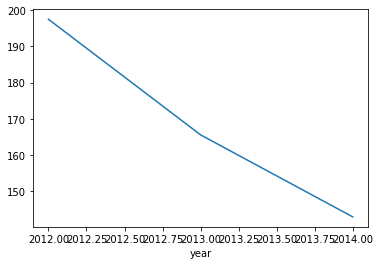

In [61]:
Mar3.groupby(Mar3.year).MntMeatProducts.mean().plot()
#不同年份購買肉的數值

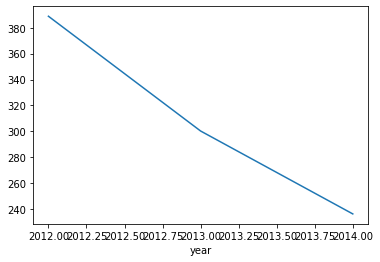

In [62]:
Mar3.groupby(Mar3.year).MntWines.mean().plot()

In [63]:
#statistical model
import statsmodels.formula.api as sm

In [64]:
list(Mar3.columns)

['ID',
 'Year_Birth',
 'income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'Country_CA',
 'Country_GER',
 'Country_IND',
 'Country_ME',
 'Country_SA',
 'Country_SP',
 'Country_US',
 'time',
 'year']

In [71]:
#build regression model??
y = Mar3['AcceptedCmp1']
f1 = 'y ~ income+Teenhome+Kidhome+Recency+MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds+NumDealsPurchases+NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumWebVisitsMonth'
#define logistic moel
logit = sm.logit(formula = f1, data = Mar3)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.161789
         Iterations 9


In [72]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2224
Method:                           MLE   Df Model:                           15
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.3219
Time:                        15:29:22   Log-Likelihood:                -362.41
converged:                       True   LL-Null:                       -534.47
Covariance Type:            nonrobust   LLR p-value:                 3.568e-64
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.4248      0.582     -9.323      0.000      -6.565      -4.284
income               9.839e-06   3.44e-06      2.863      0.004     3.1e-06    1.66e-05
Teenhome        